## Simulating Dataset

In [4]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
random.seed(42)

# Define the number of records
num_records = 1500

# Generate MEHT (Minimum Eye Height over Threshold) in feet
meht = np.random.uniform(30, 50, num_records)

# Generate C Marker (feet)
c_marker = np.random.uniform(500, 1000, num_records)

# Generate Decision Altitude (D) in feet
decision_altitude = np.random.uniform(300, 700, num_records)

# Generate Vertical Speed at Threshold (feet/min)
vertical_speed = np.random.uniform(300, 800, num_records)

# Generate Wind Speed (knots)
wind_speed = np.random.uniform(0, 30, num_records)

# Generate Wind Direction (degrees)
wind_direction = np.random.uniform(0, 360, num_records)

# Generate Runway Condition
runway_condition = np.random.choice(['Dry', 'Wet', 'Snowy', 'Icy'], num_records)

# Determine PAPI Status based on other factors
def determine_papi_status(row):
    if row['MEHT (feet)'] > 40 and 400 <= row['Vertical Speed at Threshold (feet/min)'] <= 600:
        return 'High'
    elif row['MEHT (feet)'] < 35 and 400 <= row['Vertical Speed at Threshold (feet/min)'] <= 600:
        return 'Low'
    else:
        return 'Mixed'

papi_status = []
for i in range(num_records):
    papi_status.append(determine_papi_status({
        'MEHT (feet)': meht[i],
        'Vertical Speed at Threshold (feet/min)': vertical_speed[i]
    }))

# Create DataFrame
data = pd.DataFrame({
    'MEHT (feet)': meht,
    'C Marker (feet)': c_marker,
    'Decision Altitude (feet)': decision_altitude,
    'Vertical Speed at Threshold (feet/min)': vertical_speed,
    'Wind Speed (knots)': wind_speed,
    'Wind Direction (degrees)': wind_direction,
    'Runway Condition': runway_condition,
    'PAPI Status': papi_status
})

# Shuffle the DataFrame
data = data.sample(frac=1).reset_index(drop=True)

# Convert Wind Direction to 0-360 range
data['Wind Direction (degrees)'] = data['Wind Direction (degrees)'] % 360




In [5]:
data.head()

,MEHT (feet),C Marker (feet),Decision Altitude (feet),Vertical Speed at Threshold (feet/min),Wind Speed (knots),Wind Direction (degrees),Runway Condition,PAPI Status
0,48.120471,583.296994,537.820582,578.556144,22.671223,3.557021,Dry,High
1,31.227713,707.700127,433.408616,494.840029,12.310612,269.940489,Icy,Low
2,30.159313,764.689149,378.409853,325.423608,22.032949,101.759940,Dry,Mixed
3,30.401032,954.795836,430.610765,589.534352,8.864487,46.506356,Icy,Low
4,35.987639,996.853587,539.445900,713.759831,12.543486,310.486261,Dry,Mixed


In [6]:
# Save to CSV
data.to_csv('aircraft_landing_dataset.csv', index=False)

print("Dataset generated and saved as 'aircraft_landing_dataset.csv'")

Dataset generated and saved as 'aircraft_landing_dataset.csv'


In [14]:
data.describe()

,MEHT (feet),C Marker (feet),Decision Altitude (feet),Vertical Speed at Threshold (feet/min),Wind Speed (knots),Wind Direction (degrees)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,39.904900,747.865533,498.173573,549.565095,15.370679,179.621284
std,5.832748,142.461490,115.068915,145.688029,8.529469,103.795269
min,30.020842,500.520536,300.323371,300.208653,0.091134,0.271980
25%,34.798983,624.848937,398.182395,423.696077,8.153845,89.073267
50%,39.957134,749.379836,498.976853,545.409436,15.600530,176.918967
75%,44.970562,869.199692,598.418737,682.405352,22.901595,272.162989
max,49.990423,999.802204,699.548911,799.480418,29.983015,359.858285


## Alright Let us Pre-Process

In [17]:
#pre-processing the data

#encode the categorical variables

from sklearn.preprocessing import LabelEncoder

# The Categorical columns
cc1 = data['Runway Condition']
cc2 = data['PAPI Status']

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the Categorical columns
data['Runway Condition'] = le.fit_transform(cc1)
data['PAPI Status'] = le.fit_transform(cc2)

#Standardize the numberical columns

from sklearn.preprocessing import StandardScaler

# The numerical columns

nc1 = data['MEHT (feet)']
nc2 = data['C Marker (feet)']
nc3 = data['Decision Altitude (feet)']
nc4 = data['Vertical Speed at Threshold (feet/min)']
nc5 = data['Wind Speed (knots)']
nc6 = data['Wind Direction (degrees)']

# Initialize the StandardScaler
sc = StandardScaler()

# Standardize the numerical columns
data['MEHT (feet)'] = sc.fit_transform(nc1.values.reshape(-1, 1))
data['C Marker (feet)'] = sc.fit_transform(nc2.values.reshape(-1, 1))
data['Decision Altitude (feet)'] = sc.fit_transform(nc3.values.reshape(-1, 1))
data['Vertical Speed at Threshold (feet/min)'] = sc.fit_transform(nc4.values.reshape(-1, 1))
data['Wind Speed (knots)'] = sc.fit_transform(nc5.values.reshape(-1, 1))
data['Wind Direction (degrees)'] = sc.fit_transform(nc6.values.reshape(-1, 1))

# Display the pre-processed data
data.head()

,MEHT (feet),C Marker (feet),Decision Altitude (feet),Vertical Speed at Threshold (feet/min),Wind Speed (knots),Wind Direction (degrees),Runway Condition,PAPI Status
0,1.408995,-1.155564,0.344665,0.199060,0.856206,-1.696831,0,0
1,-1.488163,-0.282033,-0.563024,-0.375757,-0.358884,0.870457,1,1
2,-1.671397,0.118132,-1.041147,-1.539016,0.781349,-0.750394,0,2
3,-1.629941,1.453019,-0.587347,0.274440,-0.763044,-1.282904,1,1
4,-0.671822,1.748340,0.358794,1.127406,-0.331572,1.261220,0,2


In [18]:
## Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# The features
X = data.drop('PAPI Status', axis=1)

# The target
y = data['PAPI Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050, 7), (450, 7), (1050,), (450,))

## Let's Construct the Classifiers

### - MACHINE LEARNING CLASSFIERS

#### 1. GaussianNB

In [24]:
#initialize 1. Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

# Initialize the Random Forest Classifier
rf = GaussianNB()

# Train the model
rf.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.92
Precision: 0.9245185452793835
Recall: 0.92
F1 Score: 0.9162174195674049
              precision    recall  f1-score   support

           0       0.98      0.70      0.82        90
           1       0.93      0.88      0.90        42
           2       0.91      0.99      0.95       318

    accuracy                           0.92       450
   macro avg       0.94      0.86      0.89       450
weighted avg       0.92      0.92      0.92       450

[[ 63   0  27]
 [  0  37   5]
 [  1   3 314]]


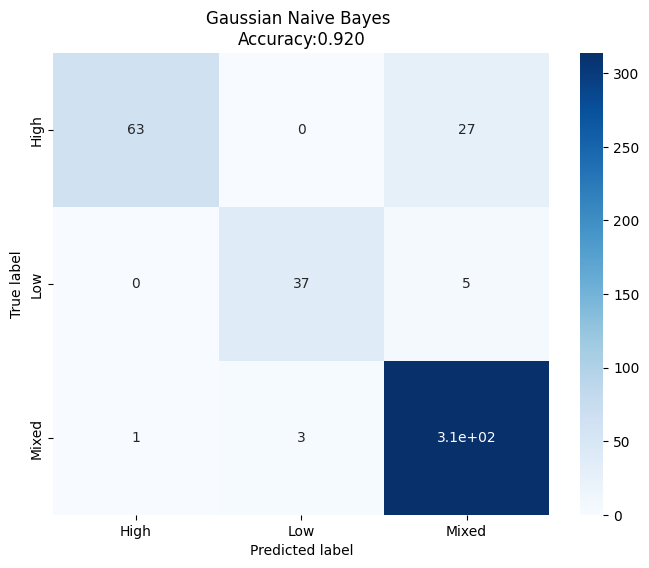

In [26]:
#Predict the test

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')


# Display the accuracy, precision, recall, and f1-score
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)


# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['High', 'Low', 'Mixed'], columns=['High', 'Low', 'Mixed'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Gaussian Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



#view the confusion matrix


In [27]:
#Save the model

import joblib

# Save the model as a pickle file
filename = 'gaussian_naive_bayes_model.pkl'
joblib.dump(rf, filename)

print("Model saved as:", filename)

#load the Train and Test data as npy array

# Save the data as a numpy array
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("Train and Test data saved as numpy arrays")

Model saved as: gaussian_naive_bayes_model.pkl
Train and Test data saved as numpy arrays


#### 2. K Nearest Classifier

Accuracy: 0.82
Precision: 0.8145191688615745
Recall: 0.82
F1 Score: 0.8151684289846619
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        90
           1       0.70      0.50      0.58        42
           2       0.85      0.90      0.88       318

    accuracy                           0.82       450
   macro avg       0.76      0.70      0.72       450
weighted avg       0.81      0.82      0.82       450



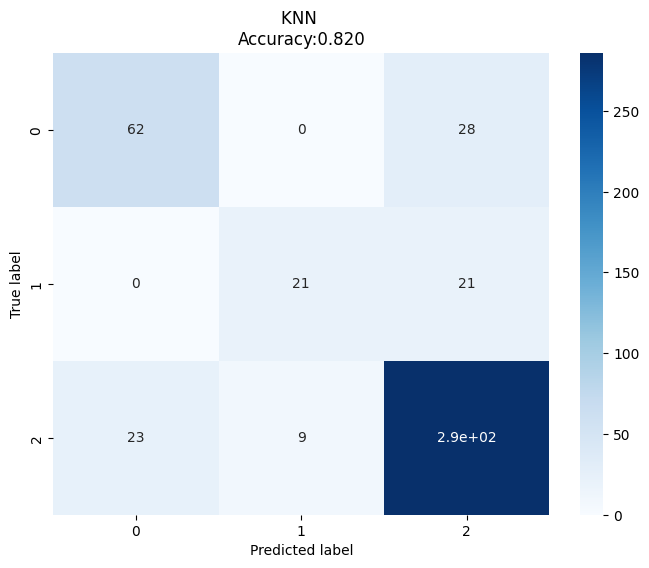

Model saved as: KNN.pkl


In [31]:
#initialize 2. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the AdaBoost Classifier

ab = KNeighborsClassifier()

# Train the model
ab.fit(X_train, y_train)

# Predict on the test data
y_pred = ab.predict(X_test)

# Calculate the accuracy, precision, recall, and f1-score
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')

# Display the accuracy, precision, recall, and f1-score
print('Accuracy:', accuracy2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1 Score:', f12)

# Display the classification report
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Save the model as a pickle file
filename = 'KNN.pkl'
joblib.dump(ab, filename)

print("Model saved as:", filename)

#### 3. SVM Classifier

Accuracy: 0.8511111111111112
Precision: 0.8493815796397313
Recall: 0.8511111111111112
F1 Score: 0.8409622466932242
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        90
           1       0.82      0.43      0.56        42
           2       0.85      0.95      0.90       318

    accuracy                           0.85       450
   macro avg       0.84      0.69      0.74       450
weighted avg       0.85      0.85      0.84       450



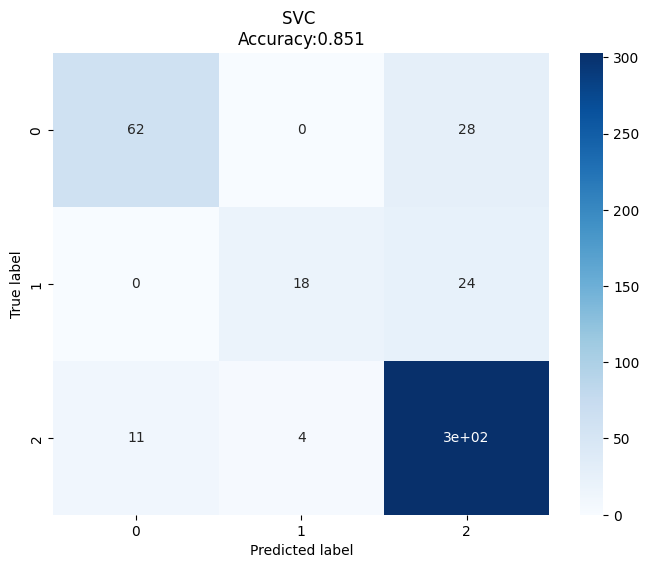

Model saved as: SVC.pkl


In [33]:
# Traing 3. SVM Classifier

from sklearn.svm import SVC

# Initialize the Gradient Boosting Classifier
gb = SVC()

# Train the model
gb.fit(X_train, y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy, precision, recall, and f1-score
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='weighted')
recall3 = recall_score(y_test, y_pred, average='weighted')
f13 = f1_score(y_test, y_pred, average='weighted')

# Display the accuracy, precision, recall, and f1-score
print('Accuracy:', accuracy3)
print('Precision:', precision3)
print('Recall:', recall3)
print('F1 Score:', f13)

# Display the classification report
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('SVC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# Save the model as a pickle file
filename = 'SVC.pkl'
joblib.dump(gb, filename)

print("Model saved as:", filename)

#### PLOT THE RESULTS

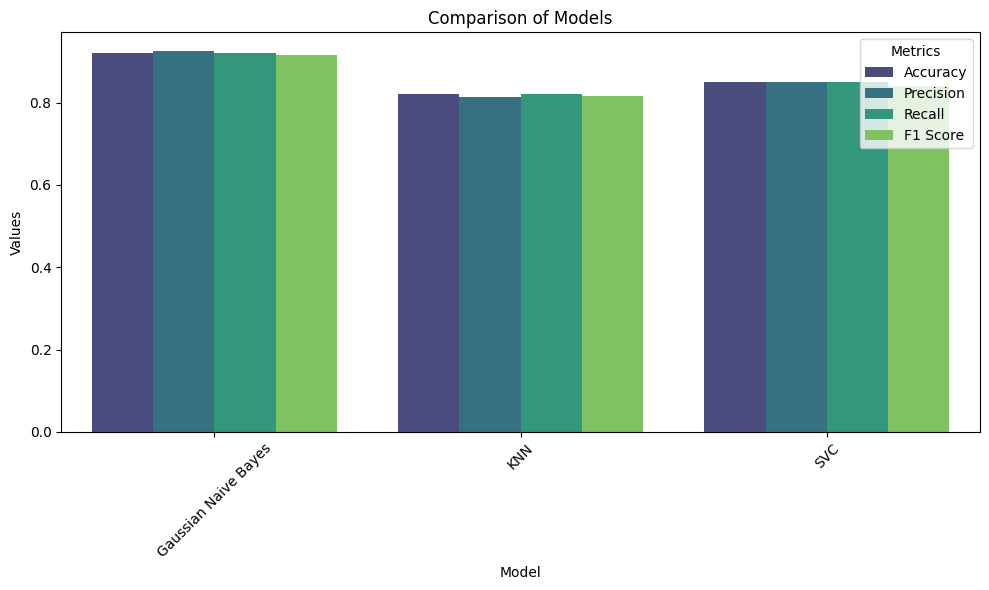

In [34]:
#plot the accuracy, precision, recall, and f1-score for all the models in a clustered bar chart

# Create a DataFrame for the metrics
metrics = {
    'Model': ['Gaussian Naive Bayes', 'KNN', 'SVC'],
    'Accuracy': [accuracy, accuracy2, accuracy3],
    'Precision': [precision, precision2, precision3],
    'Recall': [recall, recall2, recall3],
    'F1 Score': [f1, f12, f13]
}

metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame
metrics_df_melt = pd.melt(metrics_df, id_vars='Model', var_name='Metrics', value_name='Values')

# Plot a clustered bar chart with differnt colors for each metrics of each model with data labels above each bar
#Data labels above each b

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Values', hue='Metrics', data=metrics_df_melt, palette='viridis')
plt.title('Comparison of Models')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



### - DEEP LEARNING CLASSIFIER

#### 1. Simple ANN

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=75,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)





Epoch 1/75


33/33 [==============================] - 1s 9ms/step - loss: 0.8822 - accuracy: 0.6390 - val_loss: 0.7003 - val_accuracy: 0.7067
Epoch 2/75
33/33 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.7095 - val_loss: 0.5202 - val_accuracy: 0.7178
Epoch 3/75
33/33 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7771 - val_loss: 0.4154 - val_accuracy: 0.7978
Epoch 4/75
33/33 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.8390 - val_loss: 0.3302 - val_accuracy: 0.8733
Epoch 5/75
33/33 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.8800 - val_loss: 0.2679 - val_accuracy: 0.8978
Epoch 6/75
33/33 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9105 - val_loss: 0.2344 - val_accuracy: 0.9111
Epoch 7/75
33/33 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9114 - val_loss: 0.2089 - val_accuracy: 0.9000
Epoch 8/75
33/3

Model saved as 'keras_model.h5'


c:\Users\itzch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


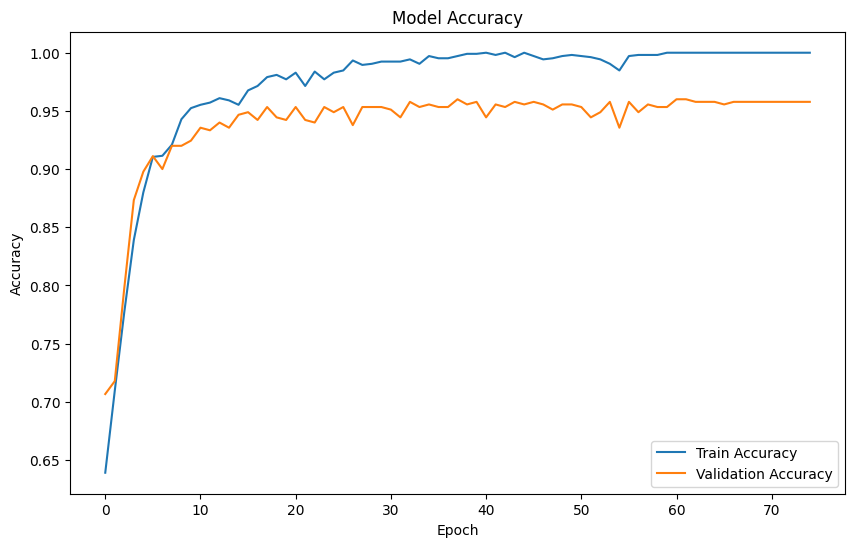

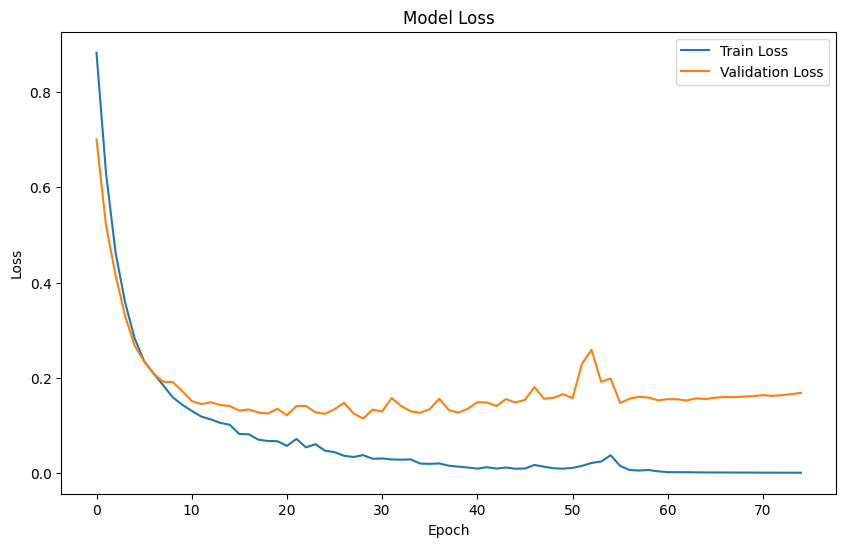

15/15 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9578
Test accuracy: 0.9577777981758118
15/15 [==============================] - 0s 1ms/step
Accuracy: 0.9577777777777777
Precision: 0.9576446829656131
Recall: 0.9577777777777777
F1 Score: 0.957416507102009
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        90
           1       0.95      0.88      0.91        42
           2       0.96      0.98      0.97       318

    accuracy                           0.96       450
   macro avg       0.95      0.92      0.94       450
weighted avg       0.96      0.96      0.96       450



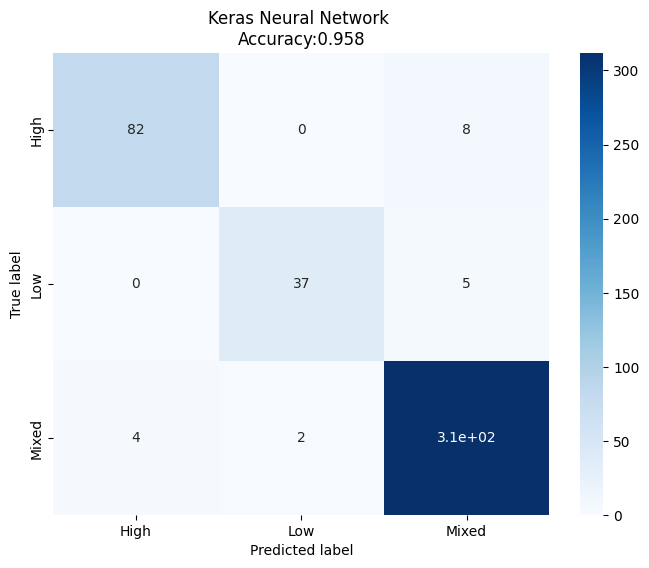

Model saved as 'simple_ann.h5'


c:\Users\itzch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Save the model as a .h5 file
model.save('keras_model.h5')

print("Model saved as 'keras_model.h5'")

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)

# Predict on the test data
y_pred = model.predict(X_test)

# Convert the predictions to a one-dimensional array
y_pred = np.argmax(y_pred, axis=1)

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the accuracy, precision, recall, and f1-score
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Display the classification report
print(classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['High', 'Low', 'Mixed'], columns=['High', 'Low', 'Mixed'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Keras Neural Network \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Save the model as a h5 file

model.save('simple_ann.h5')

print("Model saved as 'simple_ann.h5'")

#### 2. Parallel ANN

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 64)                   512       ['input_1[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 64)                   512       ['input_1[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 64)                   512       ['input_1[0][0]']             
                                                                                              

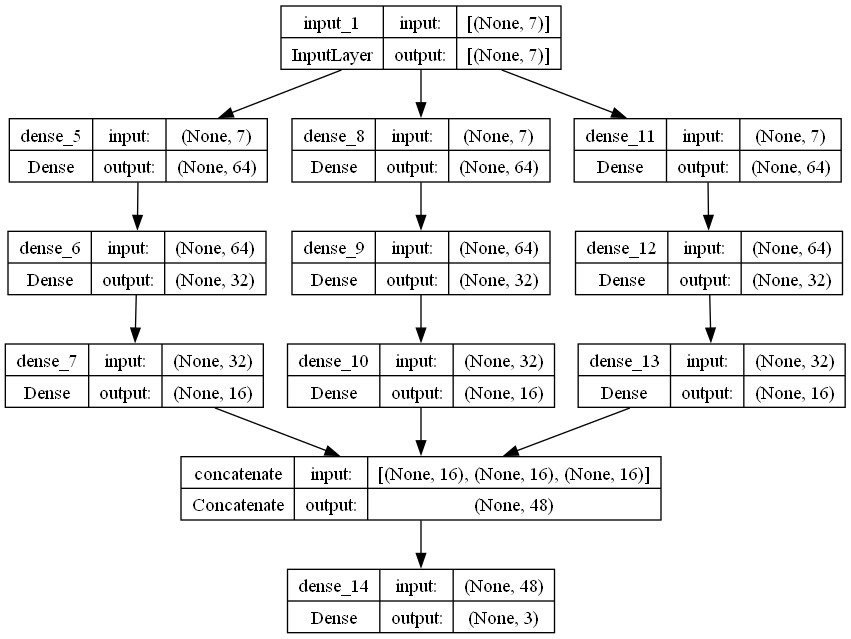

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, MultiHeadAttention
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler


def create_mlp_with_attention_model(input_shape):
    """
    Creates a Parallel Multi-Layer Perceptron (MLP) model with a for Prediciting PAPI Status for Aircraft.

    Args:

    Returns:
        tf.keras.Model: The created MLP model with multi-head attention layer.
    """

    # Input layer
    
    inputs = Input(shape=input_shape)

    # 1st Parallelism Dense layers for MLP
    dense11 = Dense(64, activation='relu')(inputs)
    dense12 = Dense(32, activation='relu')(dense11)
    dense13 = Dense(16, activation='relu')(dense12)

    # 2nd Parallelism Dense layers for MLP
    dense21 = Dense(64, activation='relu')(inputs)
    dense22 = Dense(32, activation='relu')(dense21)
    dense23 = Dense(16, activation='relu')(dense22)

    # 3rd Parallelism Dense layers for MLP
    dense31 = Dense(64, activation='relu')(inputs)
    dense32 = Dense(32, activation='relu')(dense31)
    dense33 = Dense(16, activation='relu')(dense32)

    # Concatenate the outputs of the 3 parallel MLPs
    concatenated_output = tf.keras.layers.Concatenate()([dense13, dense23, dense33])

    # Final dense layer
    outputs = Dense(3, activation='softmax')(concatenated_output)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model


model2 = create_mlp_with_attention_model(input_shape=(X_train.shape[1],))

optimizer = tf.keras.optimizers.Adam()
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
model2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Display the model summary
model2.summary()

# plot the model
plot_model(model2, show_shapes=True)

In [40]:
# Train the model
history = model2.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)

Epoch 1/75
33/33 [==============================] - 2s 9ms/step - loss: 0.8391 - accuracy: 0.6619 - val_loss: 0.6622 - val_accuracy: 0.7067
Epoch 2/75
33/33 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.7171 - val_loss: 0.5283 - val_accuracy: 0.7467
Epoch 3/75
33/33 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7695 - val_loss: 0.4440 - val_accuracy: 0.7956
Epoch 4/75
33/33 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.8171 - val_loss: 0.3771 - val_accuracy: 0.8489
Epoch 5/75
33/33 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8600 - val_loss: 0.3226 - val_accuracy: 0.8600
Epoch 6/75
33/33 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.8895 - val_loss: 0.2883 - val_accuracy: 0.8822
Epoch 7/75
33/33 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.9029 - val_loss: 0.2507 - val_accuracy: 0.8978
Epoch 8/75
33/33 [==

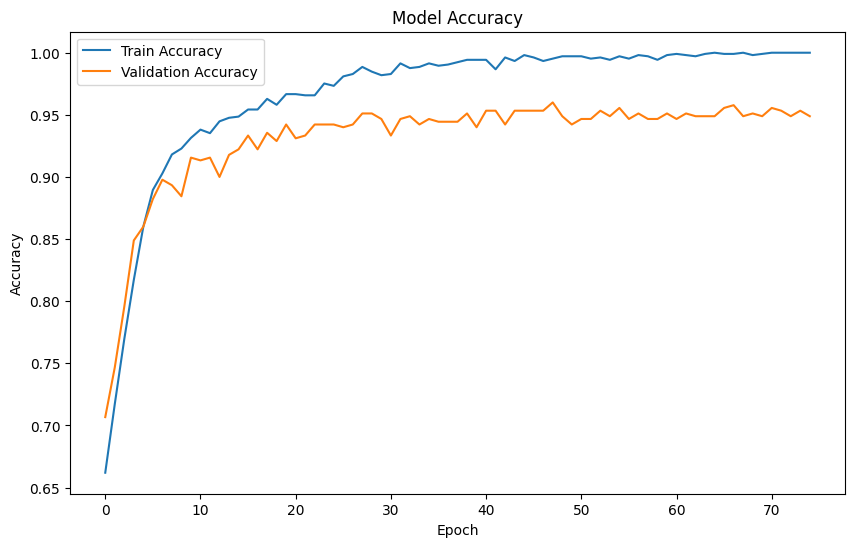

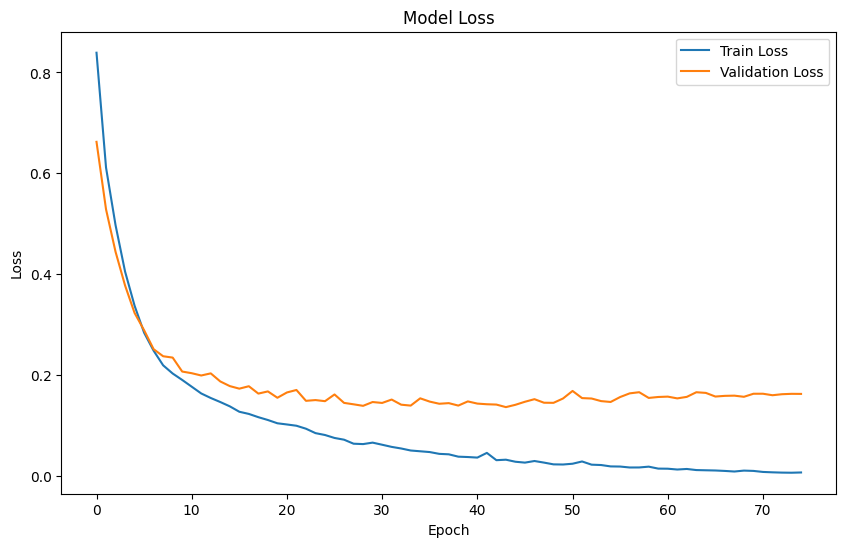

In [41]:
#PLot the training and validation accuracy and loss

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Display the plot
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Display the plot
plt.show()

15/15 [==============================] - 0s 2ms/step
Accuracy: 0.9488888888888889
Precision: 0.9490177638453502
Recall: 0.9488888888888889
F1 Score: 0.9488532399709831
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        90
           1       0.89      0.93      0.91        42
           2       0.96      0.97      0.96       318

    accuracy                           0.95       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.95      0.95      0.95       450



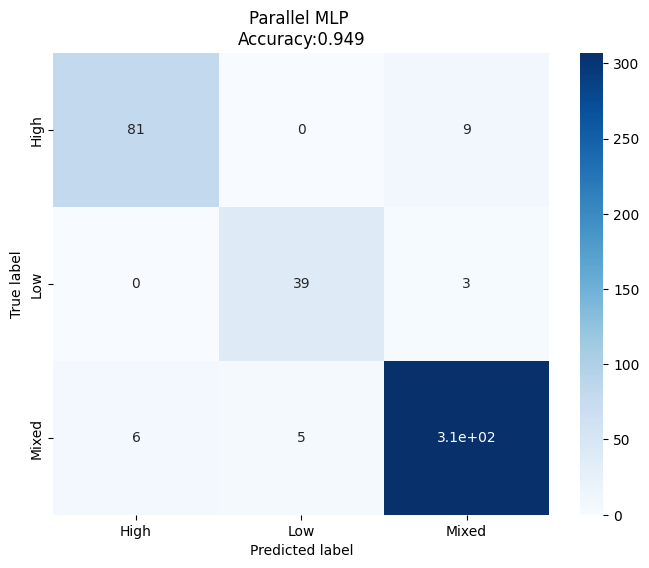

Model saved as 'parallel_mlp.h5'


c:\Users\itzch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Precision Score, Recall Score, F1 Score

# Predict on the test data
y_pred = model2.predict(X_test)

# Convert the predictions to a one-dimensional array
y_pred = np.argmax(y_pred, axis=1)

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the accuracy, precision, recall, and f1-score
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Display the classification report
print(classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['High', 'Low', 'Mixed'], columns=['High', 'Low', 'Mixed'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Parallel MLP \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Save the model as a h5 file

model2.save('parallel_mlp.h5')

print("Model saved as 'parallel_mlp.h5'")